# **Visulazation of the Airline Reviews Dataset**

# Table of contents
A. [Collecting airline review datasets](#step1) <br>
> [Airlines that won travelers choice winner over years](#step1.1) <br>
>  [Airlines rating](#step1.2) <br>
> [Airlines rating by category](#step1.3) <br>

B. [Airline review dataset](#step2)
> [Number of reviews by airline](#step2.1) <br>
>  [Percentage of ratings from 1 to 5 for each airline](#step2.2) <br>
> [The relationship between the rating and the number of words in the review](#step2.3) <br>
> [Word frequencies in the reviews](#step2.4) <br>
> [Number of reviews by year](#step2.5) <br>
> [Ratings over time](#step2.6) <br>
> [The earliest and latest reviews](#step2.7) <br>
> [Number of reviews per rating star for reviewers who rated all categories](#step2.8) <br>


In [1]:
import re
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
import warnings
warnings.filterwarnings('ignore')

## **Gneneral airline rating dataset** <a name="step1"></a>

In [3]:
dfGeneral= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/generalInfoAirlinesCleaned.csv',index_col=0)

In [4]:
dfGeneral.head()

,rating,reviews,travelers_choice_winner,Legroom,Seat comfort,"In-flight entertainment (WiFi, TV, movies)",Onboard Experience,Customer service,Value for money,Cleanliness,Check-in and boarding,Food and beverage
airline_name,,,,,,,,,,,,
saudia_airlines,3.0,"3,695 reviews",[2018],3.5,3.5,3.0,3.5,3.5,3.5,3.5,3.5,3.5
turkish_airlines,3.5,"34,447 reviews","[2019, 2018, 2017]",3.5,3.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0
qatar_airways,4.0,"34,682 reviews","[2020, 2019, 2018, 2017]",4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.0
etihad_airways,3.0,"18,247 reviews","[2018, 2017]",3.5,3.5,3.5,3.5,3.5,3.5,4.0,3.5,3.5
emirates,4.0,"64,105 reviews","[2020, 2019, 2018, 2017]",4.0,4.0,4.5,4.0,4.0,4.0,4.5,4.5,4.0


In [5]:
# convert the list of years to string
dfGeneral['travelers_choice_winner']= dfGeneral['travelers_choice_winner'].str.replace('\[|\]| ','')
unique_years= dfGeneral['travelers_choice_winner'].str.split(',')
unique_years= [item for sublist in unique_years for item in sublist ]
unique_years= set(unique_years)

In [6]:
unique_years

{'2017', '2018', '2019', '2020'}

### **Airlines that won travelers choice winner over years** <a name="step1.1"></a>

In [7]:
# create a new df with the unique years
phrases = [str(r) for r in unique_years]
winner_df= pd.DataFrame(index= dfGeneral.index,columns=phrases)
winner_df= winner_df.reindex(sorted(winner_df.columns), axis=1)
winner_df= winner_df.replace(np.nan,'')

In [8]:
winner_df

,2017,2018,2019,2020
airline_name,,,,
saudia_airlines,,,,
turkish_airlines,,,,
qatar_airways,,,,
etihad_airways,,,,
emirates,,,,


In [9]:
# search in df if airline index it's a winner in that year
def match(text):
  expression = rf'(?:^|(?<=\s))(?:{"|".join(phrases)})(?=[,\.!?;:\s]|$)'
  r = re.findall(expression, text)
  return r

In [10]:
mydic = collections.defaultdict(list)
phrases = [str(r) for r in unique_years]
count= 0

for i in dfGeneral['travelers_choice_winner']:
  m= match(str(i).translate(str.maketrans({'[': ' ', ']': ' ', ',':' '})))
  for j in m:
    mydic[j].append(dfGeneral.iloc[count].name)

  count= count+1

In [11]:
for key, value in mydic.items():
  for j in value:
    winner_df.loc[j, key]= '✅'

In [12]:
temp= len(winner_df)
for i in unique_years:
    for t in range(temp):
        if(winner_df[i][t]!='✅'):
             winner_df[i][t]='❌'

In [13]:
print('Travelers Choice Winner')
winner_df

Travelers Choice Winner


,2017,2018,2019,2020
airline_name,,,,
saudia_airlines,❌,✅,❌,❌
turkish_airlines,✅,✅,✅,❌
qatar_airways,✅,✅,✅,✅
etihad_airways,✅,✅,❌,❌
emirates,✅,✅,✅,✅


### **Airlines rating** <a name="step1.2"></a>

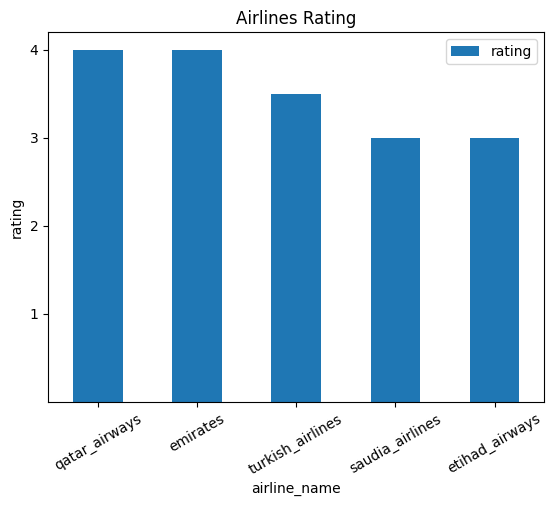

In [14]:
dfplot = dfGeneral.copy()
dfplot = dfplot.sort_values('rating', ascending=False)
dfplot = dfplot[['rating']]
#sns.set_style("dark")
dfplot=dfplot.astype(float)
fig,ax = plt.subplots()
dfplot.plot(kind='bar',ax=ax,title='Airlines Rating')
plt.ylabel("rating")
plt.xticks(rotation=30, horizontalalignment="center")
plt.yticks(np.arange(1, 5,1))

plt.show()

### **Airlines rating by category** <a name="step1.3"></a>

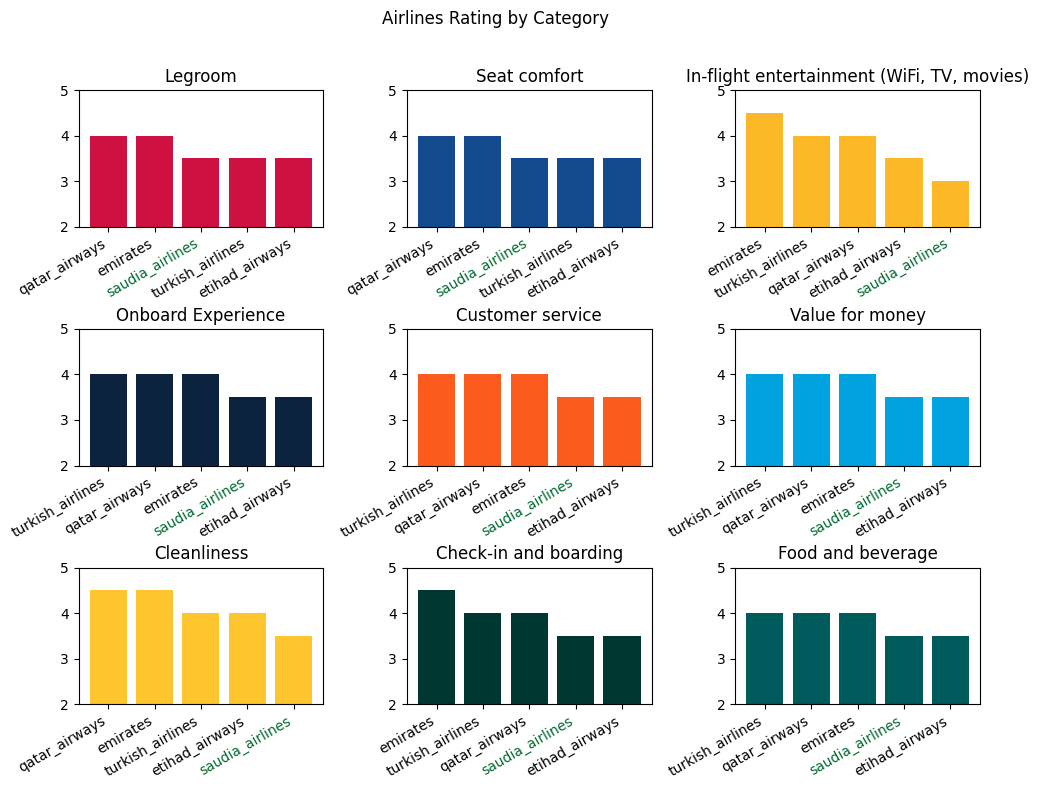

In [15]:
colors=['#AB0003', '#CE1141', '#134A8E', '#FDB827', '#0C2340', '#FD5A1E', '#00A3E0', '#ffc52f', '#003831', '#005C5C', '#E31937', '#8FBCE6']

dfPlotCategory=  dfGeneral[['Legroom','Seat comfort',
                            'In-flight entertainment (WiFi, TV, movies)','Onboard Experience','Customer service','Value for money',
                              'Cleanliness','Check-in and boarding','Food and beverage']]
fig = plt.figure(figsize=(10, 8))
count = 1
for i in dfPlotCategory.columns:
    ds = dfPlotCategory.sort_values(i, ascending=False)
    ax = fig.add_subplot(3, 3, count)
    ax.set_ylim(2, 5)
    ax.set_title(i)
    ax.bar(ds.index, ds[i],color=colors[count])
    id_tick_change_colour = ds.index.get_loc('saudia_airlines')
    plt.setp(ax.get_xticklabels()[id_tick_change_colour], color='#006b30')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    fig.tight_layout()
    count += 1
fig.suptitle('Airlines Rating by Category')
fig.subplots_adjust(top=0.88)
plt.show()

## **Airline review dataset**  <a name="step2"></a>

In [16]:
df_airlines= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airlines_dataset.csv',index_col= 0)
pd.set_option('display.max_colwidth', None)
df_airlines.head()

,airline_name,review_title,review_description,review_month,review_year,rating_stars,travel_month,travel_year,Seat comfort,Customer service,Cleanliness,Food and Beverage,Legroom,In-flight Entertainment,Value for money,Check-in and boarding
0,saudia_airlines,If you have no other choice or are on a limited budget,"Probably the worst airline I have ever flown with. Delayed, lost baggage, food was shocking and the flight crew looked like they couldn't be bothered throughout. Inflight entertainment was shocking also.",10,2023,1,9,2023,3,1,3,1,3,1,2,1
1,saudia_airlines,DO NOT FLY SAUDIA,"unreliable, keeps changing flight times and dates and unresponsive to emails, cancelled before even getting on the flight",10,2023,2,10,2023,0,0,0,0,0,0,0,0
2,saudia_airlines,You are fare from Saudi vision 2030,"The service on board is perfect. The problem is regarding al fursan, shame on you always you forget to give us our miles and when we call you i need at least 3 days by calling you and wait minium 30 mn.This is not the way to have a great vision for 2030 !!!!!",10,2023,1,8,2023,0,0,0,0,0,0,0,0
3,saudia_airlines,Worst customer service,"Flight Number SV551, from JED to DXB. I would like to bring to your attention the various issues my friend and I encountered during this flight.Upon reaching the check-in counter, I experienced a considerable delay in obtaining my boarding pass due to customers taking an extended amount of time to address baggage weight and contents. The ground staff, during this time, engaged in unprofessional behaviour by laughing and joking amongst themselves, disregarding the inconvenience faced by the waiting customers.Accompanying me was my friend, who required wheelchair assistance due to a fractured ankle. Contrary to usual procedures at other airports, Saudi Airlines required us to proceed to gate 1 to request a wheelchair from customer service. This unexpected deviation from standard protocol contributed to further delays. Despite the challenges posed by the fractured ankle, we rushed to reach the boarding gate (13A), which was the last call for boarding, only to be met with a supervisor displaying extreme rudeness, arrogance, and disrespect towards us.Moreover, at the baggage claim area, we were made to wait for an extended period of 50 minutes before being informed that our baggage had not been offloaded and was still on the flight. To exacerbate the situation, the assistance provided by various customer service agents yielded inconsistent and conflicting information, leaving us without proper guidance or assistance throughout the process.I am profoundly disappointed with the overall service provided by Saudi Airlines during this flight. The lack of professionalism, disregard for passengers' needs, and inadequate communication are unacceptable and reflect poorly on the airline's reputation. This was my first and last flight with Saudi Airlines.",10,2023,1,10,2023,0,1,0,0,0,0,0,1
4,saudia_airlines,Dissatisfaction and unprofessionalism from Saudia Airlines,"I am writing this about my experience regarding a highly distressing incident that occurred during my recent travel experience with Saudia Airline on 29th September and flight number SV598 .I believe it is essential to bring this matter to your attention to ensure that such incidents are thoroughly investigated and appropriate actions are taken.On 29th September 2023, my family and I were scheduled to depart on the above-mentioned flight from Jeddah Airport to Dubai. We arrived at the gate well in advance, approximately 25 minutes before the scheduled departure time, which should have allowed us plenty of time to board the flight. However, the events that unfolded at the gate were both bewildering and deeply disappointing.At the time of boarding, my father and my younger brother were at the prayer hall within the airport while I had went to call them, while my mother, sister, elder brother,were present at the boarding gate. We were well within the airline's required 

### **Number of reviews by airline** <a name="step2.1"></a>

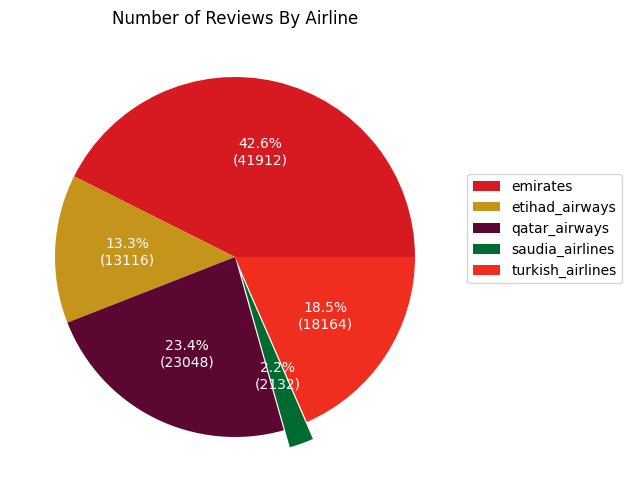

In [17]:
# number of reviews by airlines
color=['#D71A21','#C5941B','#5C0632','#006b30','#EF2E1F']

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
df_group= df_airlines.groupby(['airline_name']).size()
plt.pie(df_group, colors=color,autopct=autopct_format(df_group)
        , explode=(0,0,0,0.1,0), \
                    startangle=0,textprops={'color':"w"})
plt.legend(df_group.index, bbox_to_anchor=(1, 0.7))
plt.tight_layout()
plt.title('Number of Reviews By Airline')
plt.show()

### **Percentage of ratings from 1 to 5 for each airline** <a name="step2.2"></a>


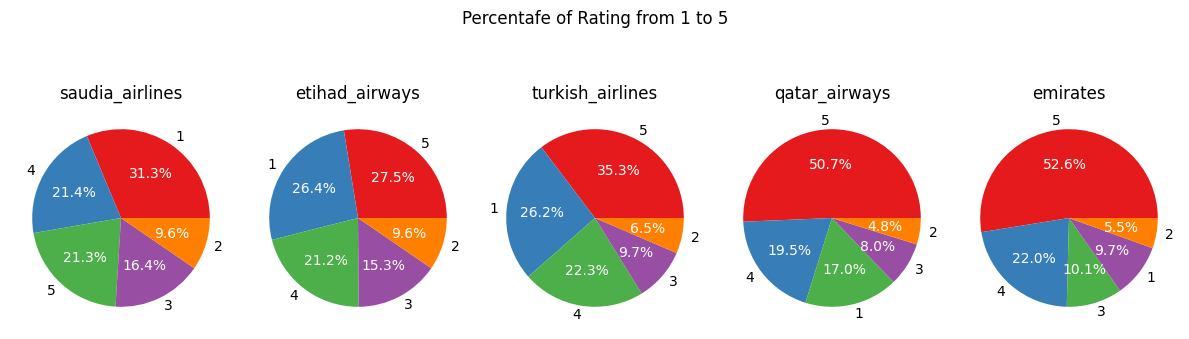

In [18]:
airlines_list = df_airlines['airline_name'].unique()
fig, axs = plt.subplots(1,5,figsize=(12, 4))
for index,item in enumerate(airlines_list):
    df_temp= df_airlines[df_airlines['airline_name']==item]
    s = df_temp['rating_stars'].value_counts()
    patches, texts, autotexts = axs[index].pie(s,labels = s.index,autopct='%1.1f%%',colors=sns.color_palette('Set1'))
    [autotext.set_color('white') for autotext in autotexts]
    axs[index].set_title(item)
fig.suptitle('Percentafe of Rating from 1 to 5')
plt.tight_layout()
plt.show()


### **The relationship between the rating and the number of words in the review** <a name="step2.3"></a>


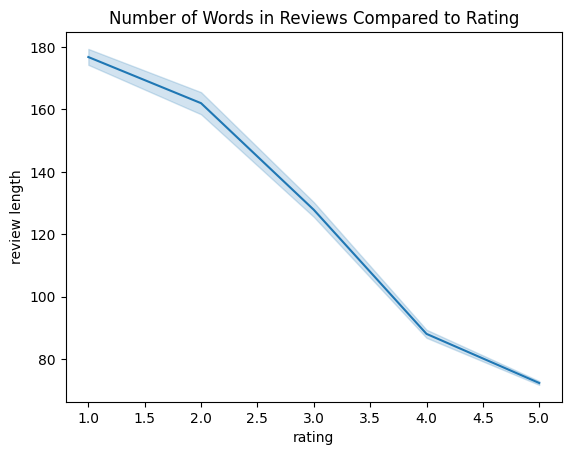

In [19]:
df_airlines['description_length'] = df_airlines['review_description'].str.count(" ")
sns.lineplot(x='rating_stars', data=df_airlines, y='description_length')
plt.ylabel("review length")
plt.xlabel("rating")
plt.title('Number of Words in Reviews Compared to Rating')
plt.show()

**Ingisht**</br>
Higher rated reviews tend to have less words while, lower rated reviews have very high word count

### **Word frequencies in the reviews** <a name="step2.4"></a>
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

In [20]:
def plot_wordcloud(wordcloud):
    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [21]:
def wordcloud_from_sentences(sentences):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in sentences:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(
        width = 800,
        height = 800,
        background_color ='white',
        stopwords = stopwords,
        min_font_size = 10
    ).generate(comment_words)

    plot_wordcloud(wordcloud=wordcloud)

#### **Reviews title**

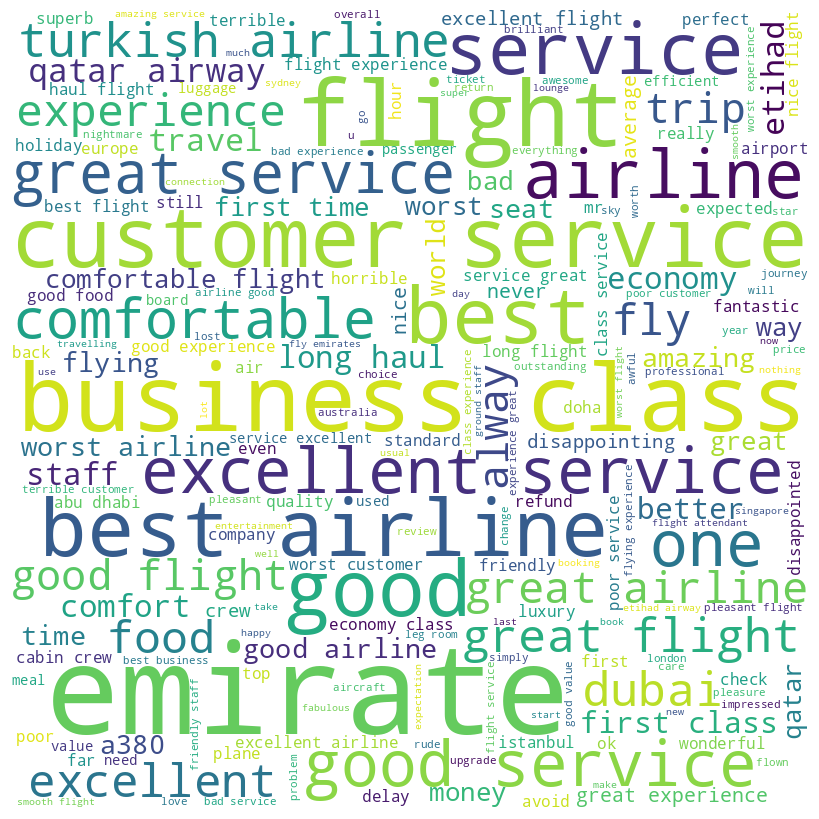

In [22]:
wordcloud_from_sentences(sentences=df_airlines['review_title'])

#### **Reviews description**

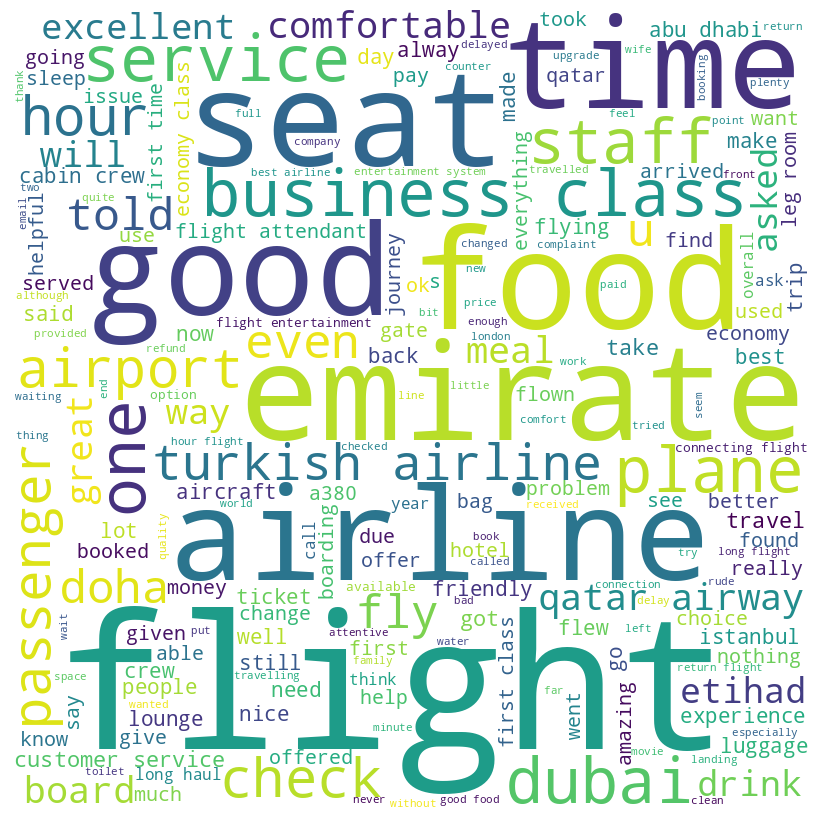

In [23]:
wordcloud_from_sentences(sentences=df_airlines['review_description'])

#### **Reviews title of Saudia Airlines**

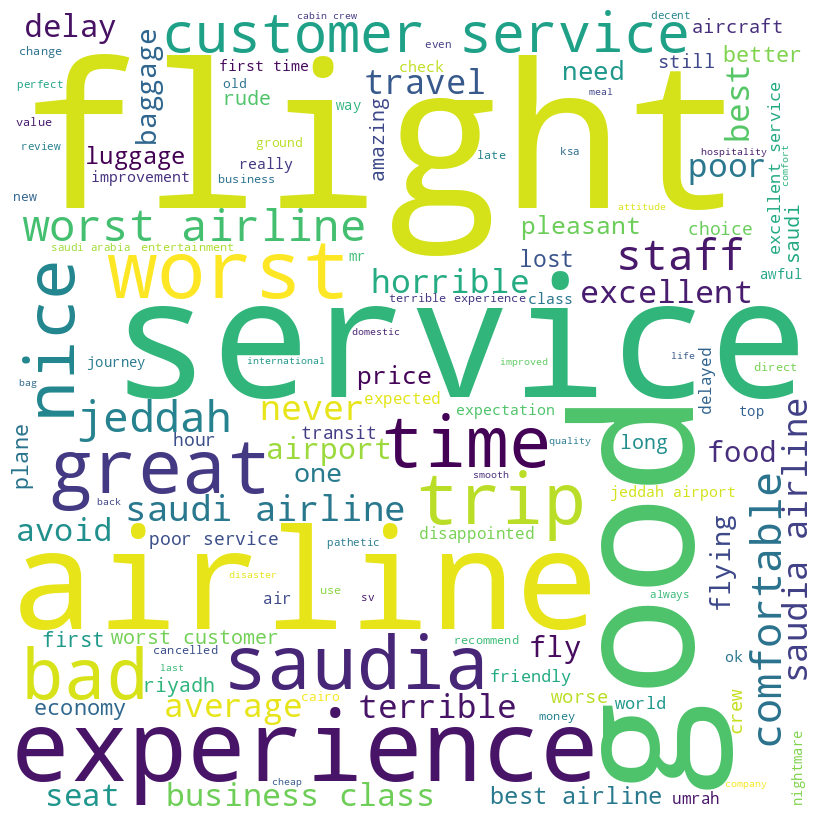

In [24]:
wordcloud_from_sentences(sentences=df_airlines[df_airlines['airline_name']=='saudia_airlines']['review_title'])

#### **Reviews description of Saudia Airlines**

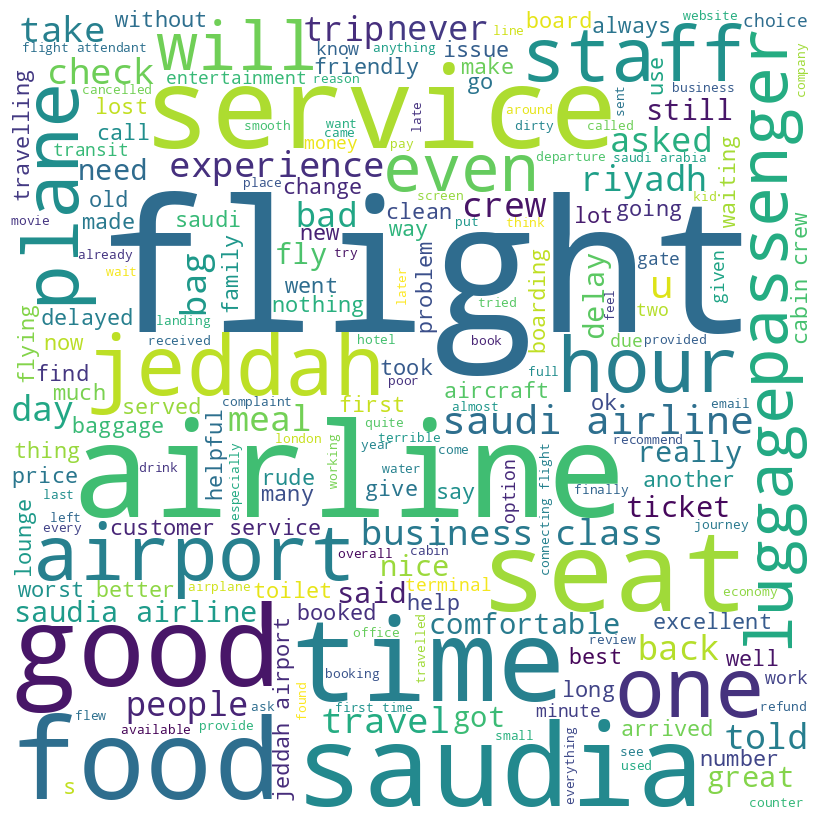

In [25]:
wordcloud_from_sentences(sentences=df_airlines[df_airlines['airline_name']=='saudia_airlines']['review_description'])

#### **Reviews with ratings 4 and 5 (good reviews)**

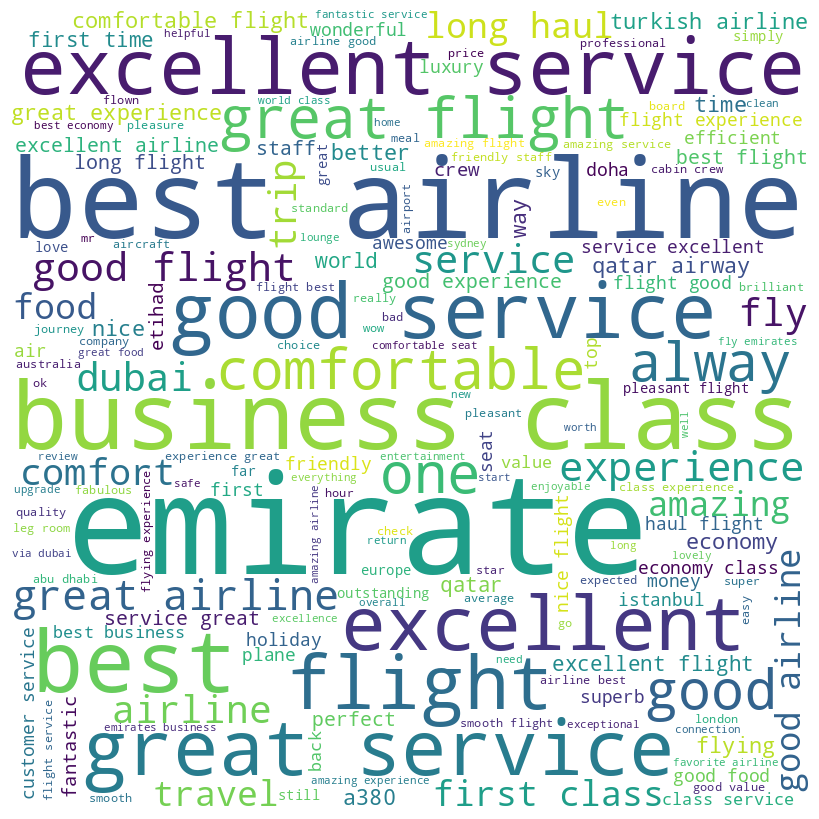

In [26]:
df_good_review = df_airlines[df_airlines['rating_stars'] >= 4]
wordcloud_from_sentences(sentences=df_good_review.review_title)

#### **Bad reviews 1, 2 and 3**

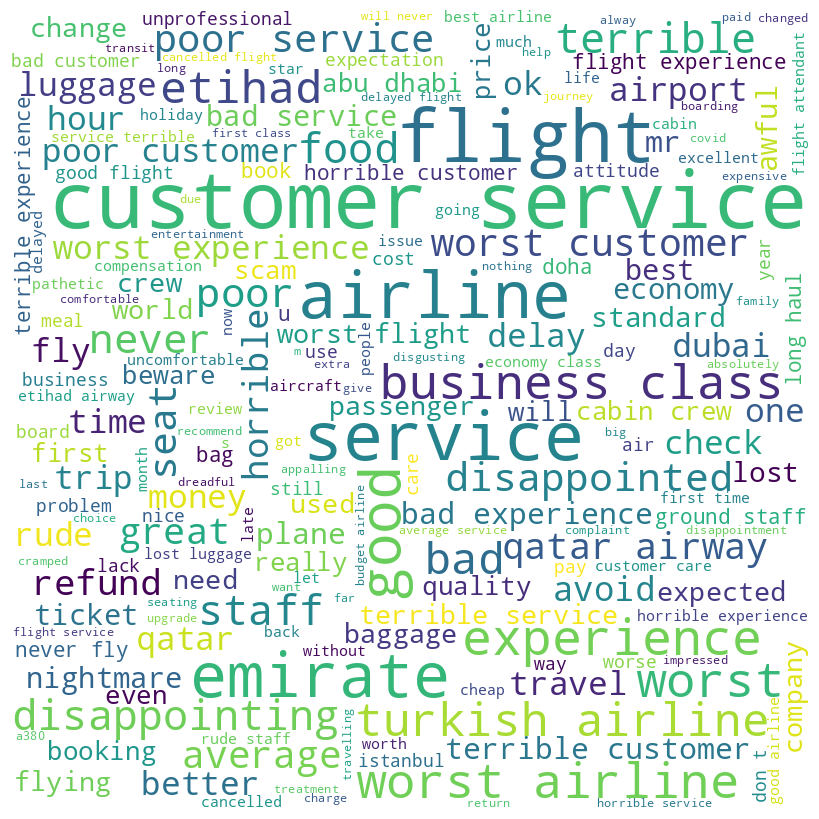

In [27]:
df_bad_review = df_airlines[df_airlines['rating_stars'] < 4]
wordcloud_from_sentences(sentences=df_bad_review.review_title)

**Ingest**

According to what is shown above, the most common source of negative ratings is bad customer service.


### **Number of reviews by year** <a name="step2.5"></a>

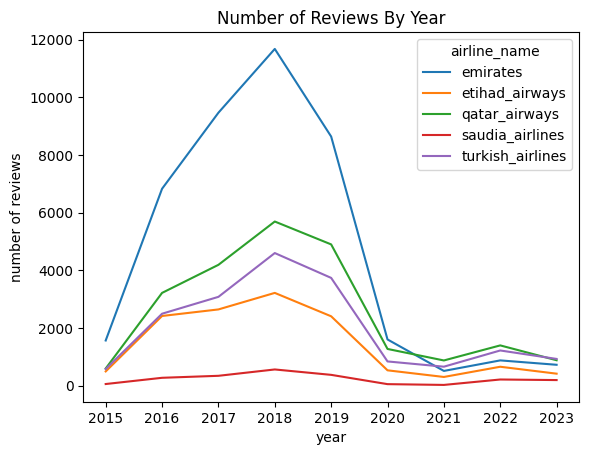

In [28]:
df_airlines.groupby([df_airlines.travel_year, "airline_name"]).size().unstack().plot()
plt.title('Number of Reviews By Year')
plt.xlabel("year")
plt.ylabel("number of reviews")
plt.show()

**Ingest**

The number of reviews is top between 2017 and 2020, and Emirates has the highest number of reviews in the dataset

### **Ratings over time** <a name="step2.6"></a>

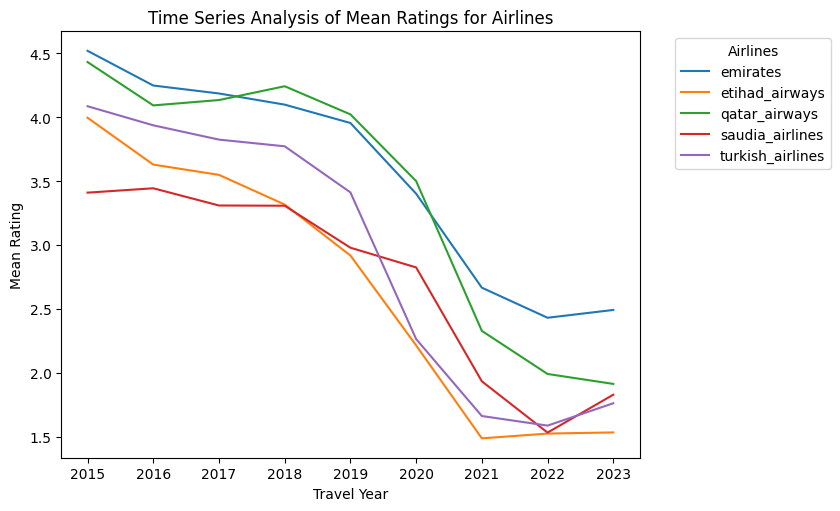

In [29]:
# Create a line plot of the mean rating for each year, grouped by airline name
fig, ax = plt.subplots()
for k, v in df_airlines.groupby('airline_name'):
    df_grouped = df_airlines[df_airlines['airline_name']==k].groupby(['travel_year'])['rating_stars'].mean()
    ax.plot(df_grouped.index, df_grouped.values,label=k)
    fig.tight_layout()

# Add the definition of each line to the plot
lines = ax.lines
legend = ax.legend(handles=lines, loc='upper left', title='Airlines')
legend_artists = legend.get_patches()
for i, artist in enumerate(legend_artists):
    artist.set_label(lines[i].get_label())
legend.set_bbox_to_anchor((1.05, 1))
# Set the x-axis label
plt.xlabel('Travel Year')

# Set the y-axis label
plt.ylabel('Mean Rating')

# Set the title of the plot
plt.title('Time Series Analysis of Mean Ratings for Airlines')

# Show the plot
plt.show()

**Ingest**

Ratings have decreased over time

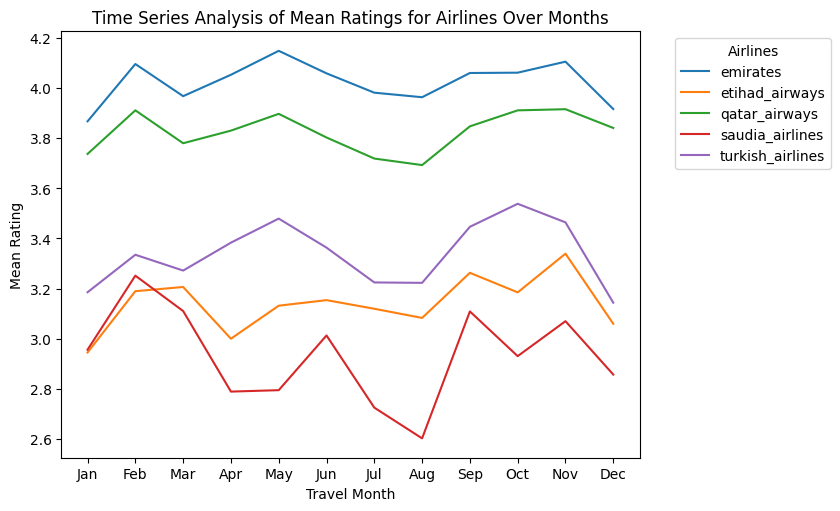

In [30]:
# Create a line plot of the mean rating for each year, grouped by airline name
fig, ax = plt.subplots()
import datetime
month_names=[]
for i in range(1,13):
    month = datetime.date(1900, i, 1).strftime('%b')
    month_names.append(month)
for k, v in df_airlines.groupby('airline_name'):
    df_grouped = df_airlines[df_airlines['airline_name']==k].groupby(['travel_month'])['rating_stars'].mean()
    df_grouped.index= month_names
    ax.plot(df_grouped.index, df_grouped.values,label=k)
    fig.tight_layout()

# Add the definition of each line to the plot
lines = ax.lines
legend = ax.legend(handles=lines, loc='upper left', title='Airlines')
legend_artists = legend.get_patches()
for i, artist in enumerate(legend_artists):
    artist.set_label(lines[i].get_label())
legend.set_bbox_to_anchor((1.05, 1))

# Set the x-axis label
plt.xlabel('Travel Month')
# Set the y-axis label
plt.ylabel('Mean Rating')
# Set the title of the plot
plt.title('Time Series Analysis of Mean Ratings for Airlines Over Months')
# Show the plot
plt.show()

**Ingest**

From November to January, the ratings are decreasing.


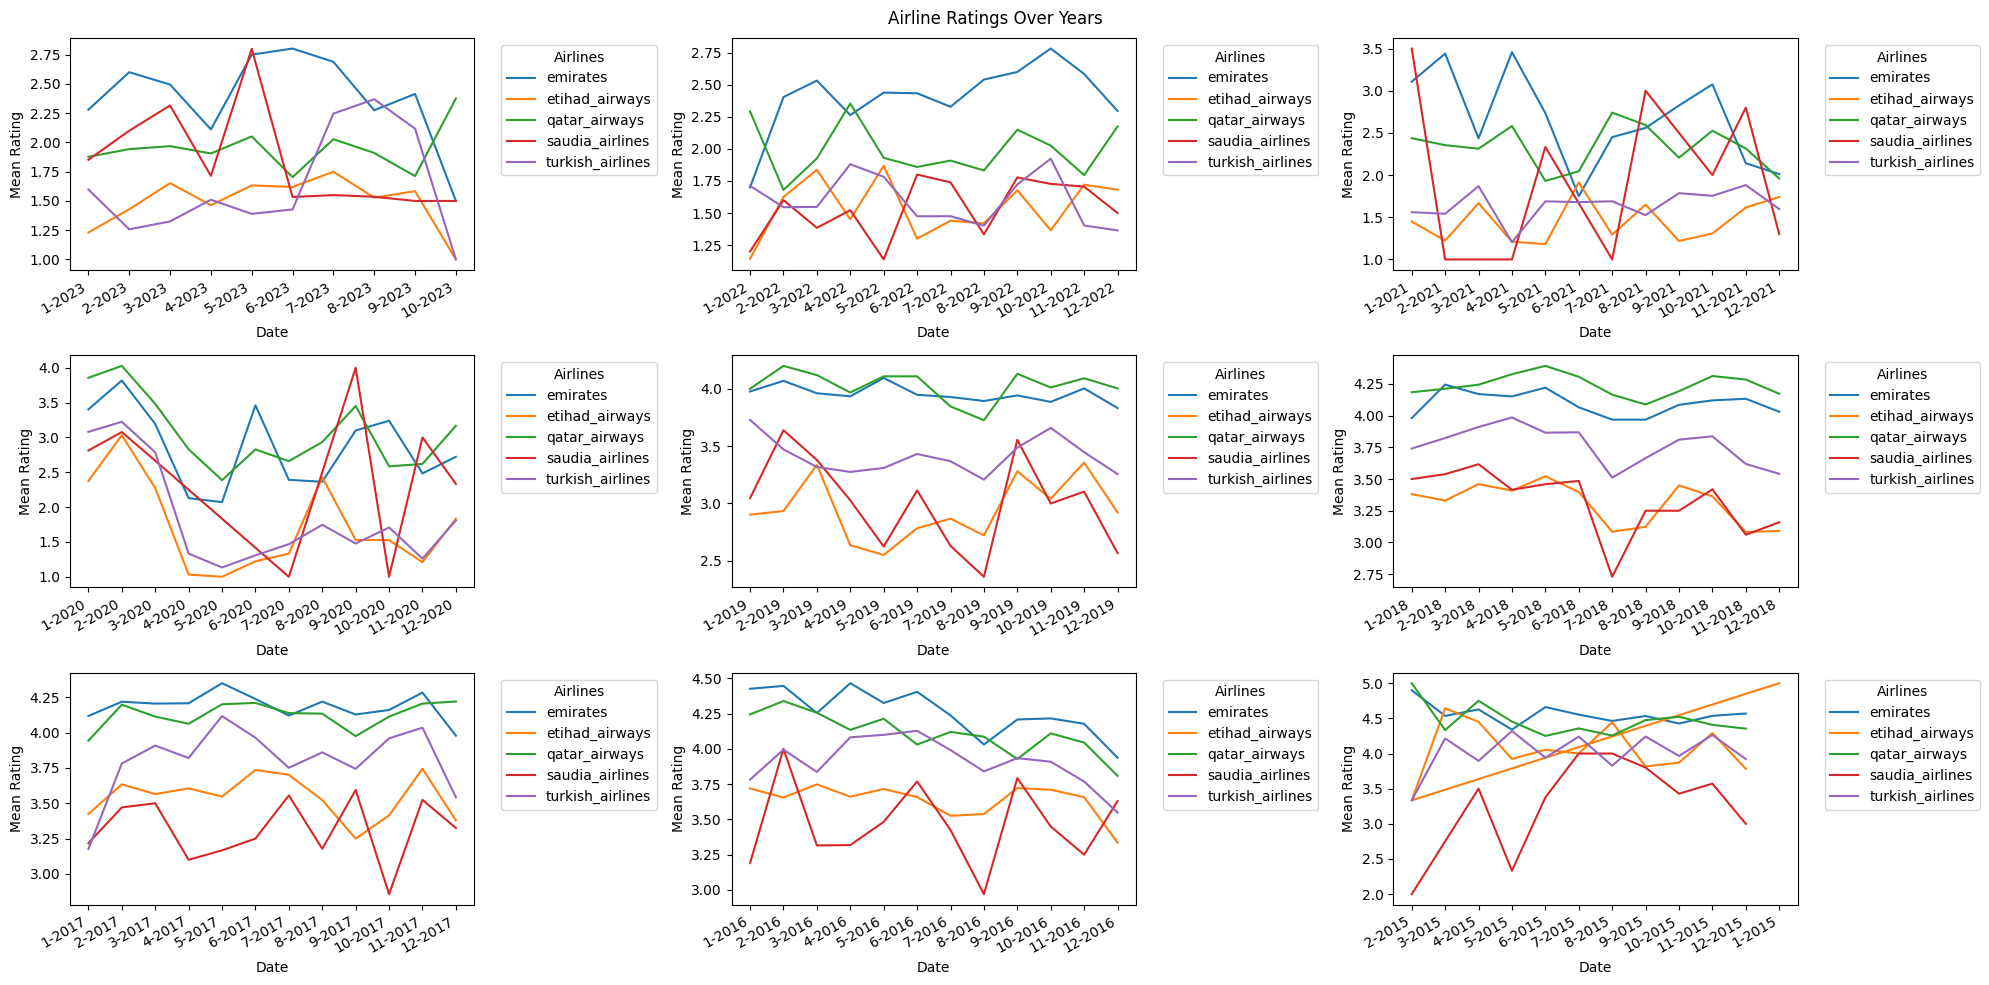

In [31]:
years= df_airlines.travel_year.unique()

# Create a figure with a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3,figsize=(20, 10))
#plt.title('Airline Rating Over Time')
fig.suptitle('Airline Ratings Over Years')
# Iterate over the years and plot the data for each year in a separate subplot
i = 0
for year in years:
    ax = axes[i // 3, i % 3]
    i += 1
    df= df_airlines.copy()
    df= df[df.travel_year==year]
    df['date'] = df['travel_month'].map(str)+ '-' +df['travel_year'].map(str)

    for k, v in df.groupby('airline_name'):
        df_grouped = df[df['airline_name']==k].groupby(['date'])['rating_stars'].mean()
        df_grouped= df_grouped.reindex(index=df_grouped.index.to_series().str.rsplit('-').str[0].astype(int).sort_values().index)
        ax.plot(df_grouped.index, df_grouped.values,label=k)
        # Set the x-axis label
        ax.set_xlabel('Date')
        # Set the y-axis label
        ax.set_ylabel('Mean Rating')
        plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
        fig.tight_layout()


      # Add the definition of each line to the plot
    lines = ax.lines
    legend = ax.legend(handles=lines, loc='upper left', title='Airlines')
    legend_artists = legend.get_patches()
    for i, artist in enumerate(legend_artists):
          artist.set_label(lines[i].get_label())
    legend.set_bbox_to_anchor((1.05, 1))


# Show the plot
plt.show()

### **The earliest and latest reviews** <a name="step2.7"></a>

In [32]:
df_reviews= df_airlines.copy()
df_reviews['review_date'] = df_reviews['review_month'].map(str)+ '-' +df_reviews['review_year'].map(str)
df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'])
print("The earliest review in the dataset is in ",str(df_reviews['review_date'].min()).split(' ')[0][:7])
print("The latest review in the dataset is in ",str(df_reviews['review_date'].max()).split(' ')[0][:7])

The earliest review in the dataset is in  2015-09
The latest review in the dataset is in  2023-10


### **Number of reviews per rating star for reviewers who rated all categories** <a name="step2.8"></a>

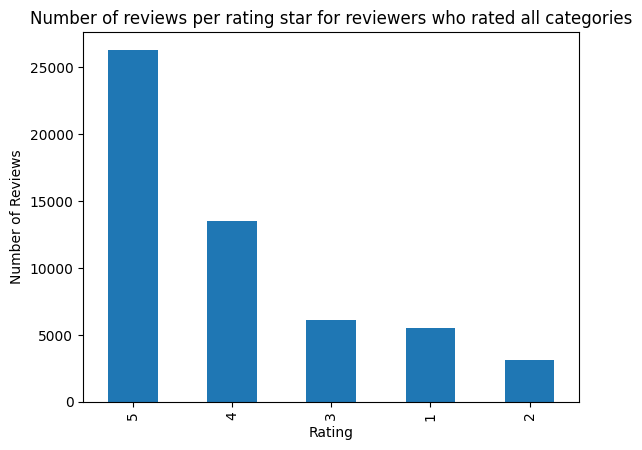

In [33]:
rating_all= df_airlines[(df_airlines[['rating_stars','Seat comfort', 'Customer service', 'Cleanliness', 'Food and Beverage', 'Legroom',
                                      'In-flight Entertainment', 'Value for money', 'Check-in and boarding']]>0).all(1)==True]

rating_all= rating_all.value_counts(['rating_stars'])
# converting mutliindex to index
new_index= [5,4,3,1,2]
for i in range(0,5):
    rating_all.index.values[i]= new_index[i]

# plot
rating_all.plot(kind='bar',title='Number of reviews per rating star for reviewers who rated all categories')
plt.ylabel("Number of Reviews")
plt.xlabel("Rating")
plt.show()

**Ingest**

When reviewers are satisfied, they rate every category.  
